# 1. 데이터 분석 개요

## Step 1: 질문하기 (Ask questions)
데이터가 주어진 상태에서 질문을 할 수도 있고, 질문에 답할 수 있는 데이터를 수집할 수도 있다.

## Step 2: 데이터 랭글링 (Wrangle data)
- 데이터 랭글링 : 원자료(raw data)를 보다 쉽게 접근하고 분석할 수 있도록 데이터를 정리하고 통합하는 과정
(참고. 위키피디아)
- 세부적으로는 데이터의 수집(gather), 평가(assess), 정제(clean) 작업으로 나눌 수 있다.

## Step 3: 데이터 탐색 (Exploratory Data Analysis)
데이터의 패턴을 찾고, 관계를 시각화 하는 작업을 통해 데이터에 대한 직관을 극대화 한다.

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)
- Step 3에서 분석한 내용을 근거로 질문에 대한 답과 결론을 도출 할 수 있다.
- 머신러닝 또는 통계 추정 과정을 거치게 되면 예측을 만들어 낼 수도 있다.

## Step 5: 결과 공유 (Communicate the results)
보고서, 이메일, 블로그 등 다양한 방법을 통해 발견한 통찰들을 공유할 수 있다.

# 2. Case Study

## Bike Sharing Demand

- 도시 자전거 공유 시스템 사용 예측
- [캐글](https://www.kaggle.com)의 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)에서 `train.csv`와 `test.csv`를 다운로드
- 두 파일을 각각 datasets 디렉토리에 bike_train.csv bike_test.csv로 저장 

**datetime** : hourly date + timestamp  
**season** : 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울  
**holiday**: 1 = 토, 일요일의 주말을 제외한 국경일 등의 휴일, 0 = 휴일이 아닌 날  
**workingday**: 1 = 토, 일요일의 주말 및 휴일이 아닌 주중, 0 = 주말 및 휴일  
**weather**:  
- 1 = 맑음, 약간 구름 낀 흐림  
- 2 = 안개, 안개 + 흐림  
- 3 = 가벼운 눈, 가벼운 비 + 천둥  
- 4 = 심한 눈/비, 천둥/번개  

**temp**: 온도(섭씨)   
**atemp**: 체감온도(섭씨)  
**humidity**: 상대습도  
**windspeed**: 풍속  
**casual**: 사전에 등록되지 않는 사용자가 대여한 횟수  
**registered**: 사전에 등록된 사용자가 대여한 횟수  
**count**: 대여 횟수  

## Step 1: 질문하기 (Ask questions)

**예시**

- (질문1) 어떤 기상정보가 자전 대여량에 영향을 미칠까?
- (질문2) 어떤 날짜(요일, 달, 계절)에 대여량이 많을까(혹은 적을까)? 
- (질문3) 언제 프로모션을 하면 좋을까?

## Step 2: 데이터 랭글링 (Wrangle data)

In [ ]:
import pandas as pd

- 데이터 적재

In [ ]:
bike = pd.read_csv('./datasets/bike_train.csv')

In [ ]:
type(bike)

pandas.core.frame.DataFrame

- 데이터 평가

In [ ]:
bike.head() # 데이터 훑어보기

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike.info() # 데이터 타입, 데이터 누락건수, 몇개의 컬럼, 몇개의 샘플

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


- 데이터 정제 (누락된 값 처리, 잘못된 데이터 타입)

In [ ]:
# bike.datetime 
bike['datetime'] # bike 데이터프레임에서 datetime이란 열의 값

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [ ]:
bike['datetime'] = bike['datetime'].apply(pd.to_datetime)

In [ ]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike['year'] = bike['datetime'].apply(lambda x : x.year)
bike['month'] = bike['datetime'].apply(lambda x : x.month)
bike['hour'] = bike['datetime'].apply(lambda x : x.hour)
bike['dayofweek'] = bike['datetime'].apply(lambda x : x.dayofweek) # 요일

In [ ]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  hour        10886 non-null  int64         
 15  dayofweek   10886 non-null  int64         
dtypes: datetime64[ns](1), 

## Step 3: 데이터 탐색 (Exploratory Data Analysis)


- **질문1에 대한 분석** : 기상정보(온도, 체감온도, 풍속, 습도)와 자전거 대여량의 관계

- (1) 산점도로 확인

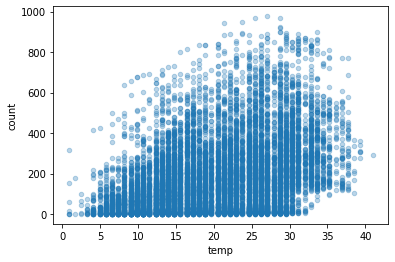

In [ ]:
bike.plot(kind='scatter', x='temp', y='count', alpha=0.3)

In [ ]:
import matplotlib.pyplot as plt

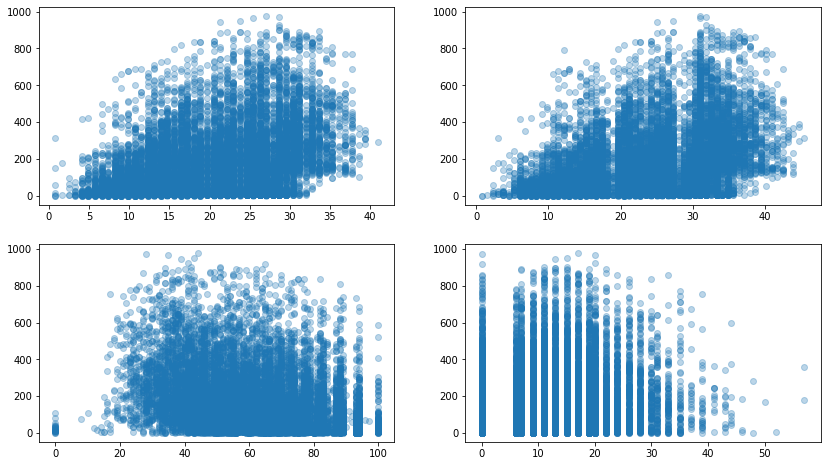

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
axes[0][0].scatter(bike['temp'], bike['count'], alpha=0.3)
axes[0][1].scatter(bike['atemp'], bike['count'], alpha=0.3)
axes[1][0].scatter(bike['humidity'], bike['count'], alpha=0.3)
axes[1][1].scatter(bike['windspeed'], bike['count'], alpha=0.3)

- (2) 상관계수 (산점도를 통해 나온 결과를 수치화된 데이터로 알려줌)

In [ ]:
bike.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.380540,-0.084427


- **분석 결과**
- 기상 정보 중 온도와 체감온도가 자전거 대여 수량에 영향을 미칠것으로 보임 (산점도, 상관계수)

**질문2에 대한 분석** 
- year, month, hour, dayofweek 특성에 따른 자전거 대여량이 어떻게 달라지는지 분석

**참고**
- year, month, hour, dayofweek : 범주형 데이터
- count(자전거 대여량) : 수치형 데이터
- 범주형 데이터 값에 따라 수치형 데이터가 어떻게 달라지는지 파악할 때 막대 그래프(barplot) 유용

In [ ]:
import seaborn as sns

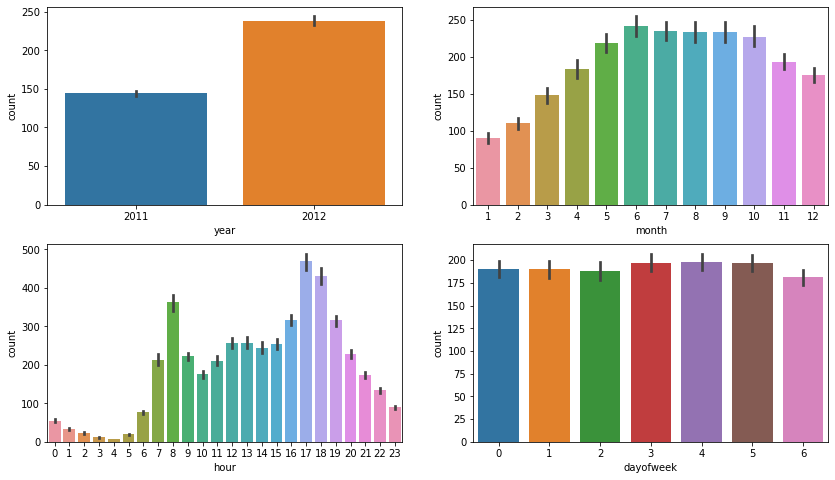

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

sns.barplot(data=bike, x='year', y='count', ax=axes[0][0])
sns.barplot(data=bike, x='month', y='count', ax=axes[0][1])
sns.barplot(data=bike, x='hour', y='count', ax=axes[1][0])
sns.barplot(data=bike, x='dayofweek', y='count', ax=axes[1][1])

**분석결과**
- 연도별 평균 대여량은 2011년도보다 2012년도에 더 많음
- 월별 평균 대여량은 6월이 가장많고, 7~10월에도 많음. 1월에 가장 적음
- 시간대별 평균 대여량은 오전 8시 전후와, 오후 5~6시 부근에 많음

## Step 4: 결론 도출 또는 예측 (Draw conclusions or make predictions)


- 질문1, 질문2에 대한 분석결과를 확인
- 온도에 따른 자전거 대여량의 변화가 예상이 되므로 이에 맞는 재고 관리 전략 수립
- 시기별(연도, 월, 시간대)로 대여량의 변화가 예상이 되므로 이에 맞는 프로모션 전략 수립

## Step 5: 결과 공유 (Communicate the results)

자전거 대여량을 예측할 때 고려해야 할 중요한 특성(기상정보, 시기)을 설명하는 보고서, PPT 등을 준비